In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import json
from pathlib import Path
from sklearn import linear_model

In [6]:
load_parallel = True

In [7]:
!ls baselines

__pycache__                      poke_5n.zip
all_runs.json                    ppo_parallel.py
best_12-7                        ray_baseline.py
eval_trained.py                  real_good_ratta
final_states_train_1             red_gym_env.py
good_route                       requirements.txt
grinds_to_level_11_extra_time_14 run_baseline.py
lvl_22                           run_baseline_parallel.py
old                              session_27b1e733
old_3                            session_4f24366b
old_good                         session_c483ca55
old_good_2                       session_cf7d4662
old_long                         session_e67f1a36
old_refactor_vr                  session_evolve_sucsess
old_somethinggood?               session_f4701d22
poke_0.zip                       session_gets_oaks_parcel
poke_12.zip                      session_long_evolve_fail
poke_2.zip                       session_short
poke_5.zip


In [48]:
run_path = 'baselines/session_2b0dc071' # 'baselines/session_f07bf8e1' #'baselines/session_3c6e719a'

In [17]:
def load_run_data(run_path):
    run_lists = []
    for p in Path(run_path).glob('all_runs_*.json'):
        with open(p, 'r') as f:
            run_lists.append(json.load(f))
    all_runs = [val for tup in zip(*run_lists) for val in tup]
    print(f'runs loaded: {len(all_runs)}')
    return all_runs

In [161]:
def plot_runs(all_runs, plot_line=False, use_keys=None, start=0):
    
    all_runs = all_runs[start:]
    x = np.arange(len(all_runs))
    
    def add_plot(y, name, alpha, size, plot_line):
        regr = linear_model.LinearRegression()
        # Optimize linear model
        regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

        # Make predictions using the testing set
        lin_y = regr.predict(x.reshape(-1, 1))

        plt.scatter(x, y, alpha=alpha, s=size, label=name)
        if plot_line:
            plt.plot(x, lin_y, linewidth=3)
        
    # convert list of dictionaries to dictionary of lists
    metrics = {m: [run[m] for run in all_runs] for m in all_runs[0].keys()}
    metrics['total'] = [sum([v for _,v in run.items()]) for run in all_runs]
    available_keys = metrics.keys()
    print(available_keys)
    if use_keys is None:
        use_keys = available_keys
        
    NUM_COLORS = len(use_keys)
    cm = plt.get_cmap('Dark2')
    cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    for i, m in enumerate(use_keys):
        add_plot(
            np.array(metrics[m]), m, 1.0, 5.0, plot_line
        )
        

    plt.title('Reward over runs PPO')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

runs loaded: 31
dict_keys(['all_events', 'seen_poke_count', 'poke_xps', 'poke_levels', 'explore_unique_frames', 'total'])


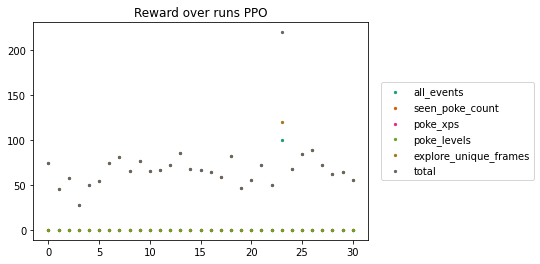

In [162]:
plot_runs(load_run_data('baselines/session_short'))

runs loaded: 302
dict_keys(['all_events', 'seen_poke_count', 'poke_xps', 'poke_levels', 'explore_unique_frames', 'total'])


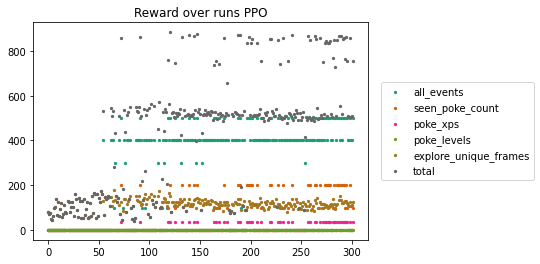

In [164]:
plot_runs(
    load_run_data('baselines/session_27b1e733'), 
    use_keys=None, 
    plot_line=False,
    start=0
)


In [49]:
if load_parallel:
    run_lists = []
    for p in Path(run_path).glob('all_runs_*.json'):
        with open(p, 'r') as f:
            run_lists.append(json.load(f))
    print(len(run_lists))
    all_runs = [val for tup in zip(*run_lists) for val in tup]
else:
    with open('baselines/all_runs.json', 'r') as f:
        all_runs = json.load(f)

64


In [50]:
all_runs = all_runs[:]

In [51]:
len(all_runs)

2304

In [52]:
x = np.arange(len(all_runs))
y = np.array(all_runs)

In [53]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Make predictions using the testing set
lin_y = regr.predict(x.reshape(-1, 1))

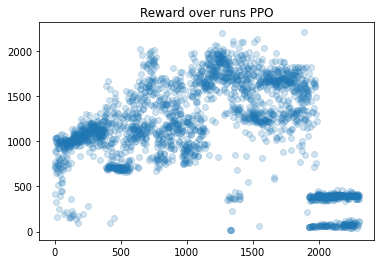

In [54]:
plt.scatter(x, y, alpha=0.2)
#plt.plot(x, lin_y, color="black", linewidth=3)
plt.title('Reward over runs PPO')
plt.show()